In [2]:
import climetlab as cml

In [78]:
cml.settings.set("cache-directory", "/mnt/data/s2s/")

In [79]:
hindcast_t2m = cml.load_dataset('s2s-ai-challenge-training-input', date=[20200102], origin='ecmwf', parameter='t2m', format='netcdf')

In [80]:
hindcast_t2m_x = hindcast_t2m.to_xarray()

In [81]:
hindcast_t2m_x.keys()

KeysView(<xarray.Dataset>
Dimensions:        (realization: 11, forecast_time: 20, lead_time: 46,
                    latitude: 121, longitude: 240)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * lead_time      (lead_time) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(20, 46), meta=np.ndarray>
Data variables:
    t2m            (realization, forecast_time, lead_time, latitude, longitude) float32 dask.array<chunksize=(11, 20, 46, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0


In [82]:
forecast_t2m = cml.load_dataset('s2s-ai-challenge-test-input', date=[20200102], origin='ecmwf', parameter='t2m', format='netcdf')

In [83]:
forecast_t2m_x = forecast_t2m.to_xarray()

In [84]:
forecast_t2m_x.keys()

KeysView(<xarray.Dataset>
Dimensions:        (realization: 51, forecast_time: 1, lead_time: 46,
                    latitude: 121, longitude: 240)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * lead_time      (lead_time) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time     (forecast_time, lead_time) datetime64[ns] dask.array<chunksize=(1, 46), meta=np.ndarray>
Data variables:
    t2m            (realization, forecast_time, lead_time, latitude, longitude) float32 dask.array<chunksize=(51, 1, 46, 121, 240), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0


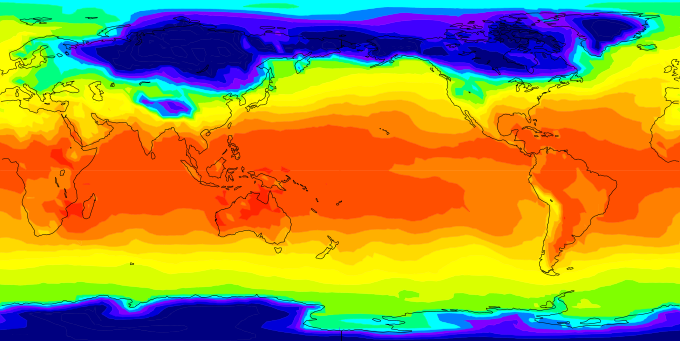

In [95]:
cml.plot_map(hindcast_t2m_x.isel(realization=0, forecast_time=0, lead_time=0))

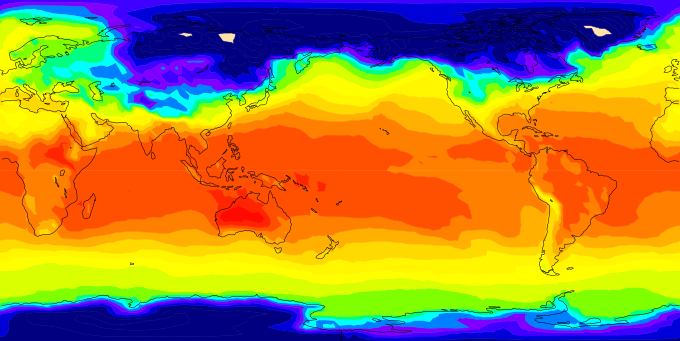

In [96]:
cml.plot_map(hindcast_t2m_x.isel(realization=0, forecast_time=0, lead_time=13), path='t2m-20190102-lead-14.png')

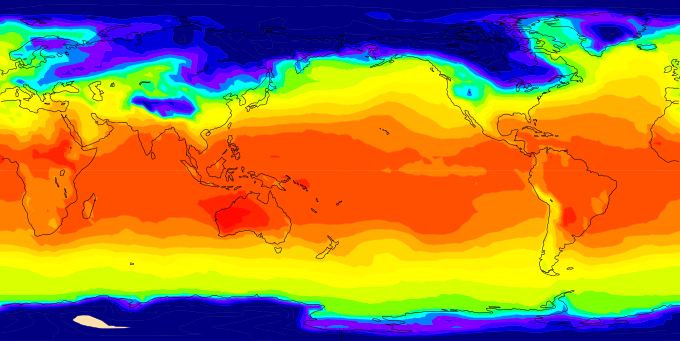

In [94]:
cml.plot_map(hindcast_t2m_x.isel(realization=0, forecast_time=0, lead_time=45), path='t2m-20190102-lead-46.png')

In [88]:
hindcast_tp = cml.load_dataset('s2s-ai-challenge-training-input', date=[20200102], origin='ecmwf', parameter='tp', format='netcdf')

In [89]:
hindcast_tp_x = hindcast_tp.to_xarray()

In [91]:
hindcast_like_obs_t2m = cml.load_dataset('s2s-ai-challenge-training-output-reference', date=[20200102], parameter='t2m').to_xarray()

In [46]:
hindcast_like_obs_t2m.keys()

KeysView(<xarray.Dataset>
Dimensions:        (lead_time: 47, forecast_time: 20, latitude: 121,
                    longitude: 240)
Coordinates:
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(47, 20), meta=np.ndarray>
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * lead_time      (lead_time) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (lead_time, forecast_time, latitude, longitude) float32 dask.array<chunksize=(47, 20, 121, 240), meta=np.ndarray>
Attributes:
    regrid_method:        conservative
    source_dataset_name:  temperature daily from NOAA NCEP CPC: Climate Predi...
    source_hosting:       IRIDL
    source_url:           http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP/...
    function:             climetlab_s2s

In [110]:
hindcast_like_obs_t2m.t2m.sel(forecast_time=slice("2000", "2001"))

<xarray.DataArray 't2m' (lead_time: 47, forecast_time: 2, latitude: 121,
                         longitude: 240)>
dask.array<getitem, shape=(47, 2, 121, 240), dtype=float32, chunksize=(47, 2, 121, 240), chunktype=numpy.ndarray>
Coordinates:
    valid_time     (lead_time, forecast_time) datetime64[ns] dask.array<chunksize=(47, 2), meta=np.ndarray>
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 2001-01-02
  * lead_time      (lead_time) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Attributes:
    pointwidth:     0
    standard_name:  air_temperature
    units:          K
    long_name:      2m Temperature
    cell_method:    lead_time: average

In [119]:
import matplotlib.pyplot as plt

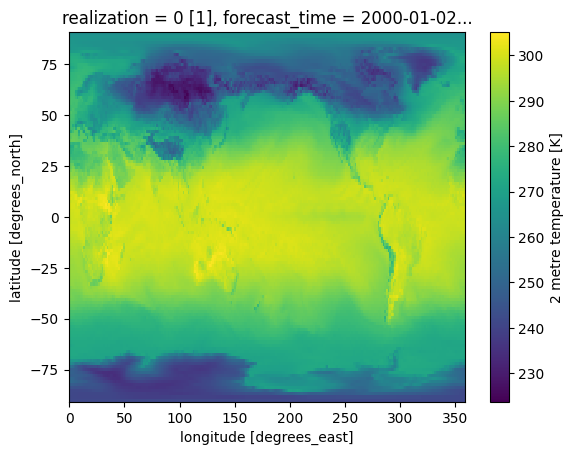

In [137]:
hindcast_t2m_x.t2m.isel(realization=0, forecast_time=0, lead_time=0).plot()